In [3]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import theano.tensor as tt
import math

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Anaconda2\envs\py36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
D:\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import

In [4]:
r = [0, 18, 8, 46, 8, 13, 9, 31, 14, 8, 29, 24]
n = [47, 148, 119, 810, 211, 196, 148, 215, 207, 97, 256, 360]
cols = ["R", "N"]
surgical_data = pd.DataFrame(columns = cols)
surgical_data["R"] = r
surgical_data["N"] = n

In [10]:
surgical_data['N'][11]

360

In [12]:
N = len(surgical_data)

In [13]:
with pm.Model() as surgical_model:
    b=np.zeros(N)
    p=np.zeros(N)
    r=np.zeros(N)
    mu_b = pm.Normal('mu', mu=0, sd = 1e-6)
    tau_b = pm.Gamma('tau', 0.001, 0.001)
    sd_b = pm.Deterministic('sd_b', 1/pm.math.sqrt(tau_b))
    for i in range(N):
        b[i] = pm.Normal('b', mu=mu_b, sd= sd_b)
        p[i] = pm.math.invlogit(b[i])
        r[i] = pm.Binomial('r', p = p[i], n = surgical_data['N'][i])
    
    

ValueError: setting an array element with a sequence.

In [13]:
with surgical_model:
    surgical_trace = pm.sample(500, tune=1000, chains=2, nuts_kwargs={'target_accept': 0.95})

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [b, tau_log__, mu]
>Metropolis: [r]
100%|██████████| 1500/1500 [00:28<00:00, 52.21it/s]
There were 120 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.740985157951789, but should be close to 0.95. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7528169791477135, but should be close to 0.95. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5200de4a8>,
      dtype=object)

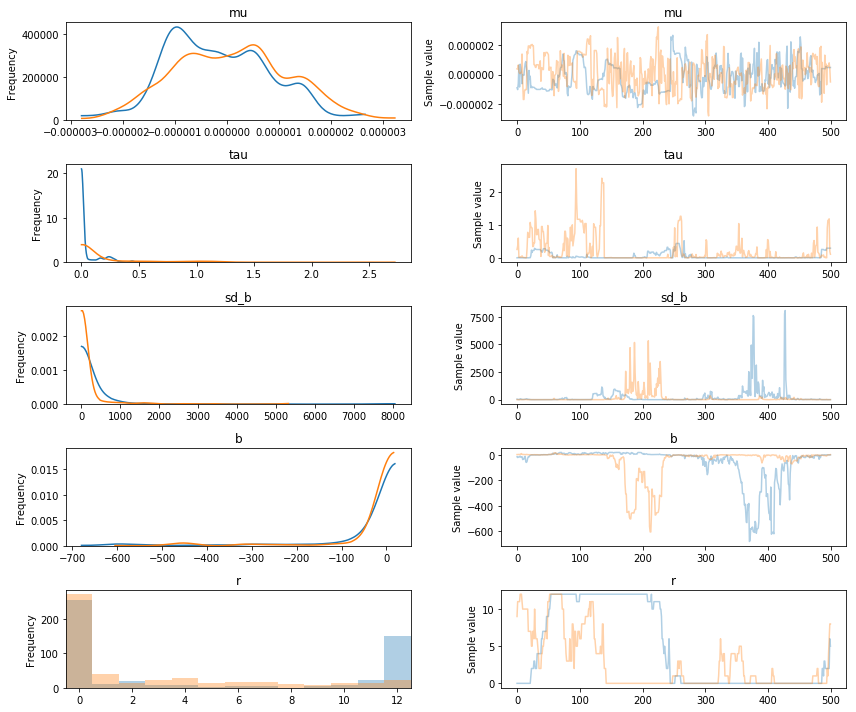

In [15]:
pm.traceplot(surgical_trace, varnames=['mu', 'tau', 'sd_b', 'b', 'r'])